### `Project 4:  Concrete Strength Prediction `

- We will demonstrate the ML strategy for concrete property prediction using the public available dataset contributed by I-Cheng Yeh (http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)


### `Objective:`
- To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Preparing the data to train a model

- Training and making predictions using regression models, cross-validation, hyperparameter tuning, and pipeline

- Model evaluation


### `Domain` 
- Civil Engineering

### `Datasets Information:`

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. The raw data contains 1030 observations with 9 attributes. The input attributes include the age of the concrete, as well as the densities of cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. The prediction of compressive strength is a regression problem

*concrete.csv:* 

| Name | Data Type | Measurement Unit| Description |
| --- | --- | --- | --- |
| Cement | quantitative | kg/m3 | Input Variable |
| Blast Furnace Slag | quantitative | kg/m3 | Input Variable |
|Fly Ash | quantitative | kg/m3 | Input Variable |
| Water	| quantitative | kg/m3 | Input Variable |
| Superplasticizer | quantitative | kg/m3 | Input Variable | 
| Coarse Aggregate | quantitative | kg/m3 | Input Variable |
| Fine Aggregate  | quantitative | kg/m3 | Input Variable | 
| Age |	quantitative | Days (1~365)	| Input Variable |
| Concrete Compressive Strength	| quantitative | MPa | Output Variable |



### `Steps and tasks:`


#### Deliverable – 1 (Exploratory data quality report reflecting the following)
###### a. Univariate analysis (10 marks)

- Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates.

##### b. Bivariate analysis (10 marks)

- Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves.

##### c. Feature Engineering techniques(10 marks)

- Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
- Get the data model ready and do a train test split.
- Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.

#### Deliverable – 2 (Creating the Model and Tuning It)  (30 marks)
- Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)
- Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)


### Deliverable – 1 (Exploratory data quality report reflecting the following)

## a. Univariate analysis (10 marks)

- Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates.

In [42]:
# Import the libraries
import numpy as np                                    # import numpy library
import pandas as pd                                   # import pandas library
import matplotlib.pyplot as plt                       # import matplotlib library
%matplotlib inline
import seaborn as sns                                 # import seaborn library
from sklearn.model_selection import train_test_split  # import function of data split
from sklearn.linear_model import LinearRegression     # import linear regression model
from sklearn.linear_model import Ridge                # import linear regression model with L2 regularization
from sklearn.linear_model import Lasso                # import linear regression model with L1 regularization
import statsmodels.formula.api as smf                 # import statistical model
from sklearn.preprocessing import PolynomialFeatures  # import polynomial transformation
from sklearn.model_selection import KFold             # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict   # import cross validation
from sklearn.metrics import mean_squared_error, r2_score      # import MSE, r2_score
from sklearn.pipeline import Pipeline                 # import pipeline
from sklearn.pipeline import make_pipeline            # import make pipeline
from sklearn.preprocessing import StandardScaler      # import standard scaler
from sklearn.model_selection import GridSearchCV      # import Grid Search
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor       # import decision tree regressor
from sklearn.ensemble import RandomForestRegressor   # import random forest 
from sklearn.ensemble import AdaBoostRegressor       # import adaptive boost
from sklearn.ensemble import BaggingRegressor        # import bagging
from sklearn.svm import SVR                          # import SVR
from sklearn.gaussian_process import GaussianProcessRegressor             # import Gaussian Process Regressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

In [43]:
# Import dataset
df = pd.read_csv('Concrete.csv')                      # read concrete data
df.head()                                             # Display the dataframe

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [44]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### Insight:
All values are numbers.

In [45]:
# Gather all Numerical Data Columns
List = df.select_dtypes(include=['int64','float64']).columns.tolist()   
List

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

In [46]:
# Check Shape
df.shape

(1030, 9)

In [47]:
# Check missing data (Null Values)
df.isnull().sum()          

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [48]:
# Check unique values
df.age.unique()

array([ 28,  14,  90,   7,  56,   3, 100,  91, 180, 365, 270, 360, 120,
         1], dtype=int64)

In [49]:
# Find duplicated rows in the dataset
duplicateDFRow = df[df.duplicated() == True]
duplicateDFRow

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [50]:
# drop duplicate rows in the dataframe
df.drop_duplicates(inplace=True)
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [51]:
# df.isnull().apply(pd.value_counts)  

## Insight: 
There is no NA data. So far we do not need to do additional changes to the dataframe considering missing values.
But there are duplicated rows in the table, we need to remove the duplicate rows as they represent the same correlation between the input and output variables.

In [52]:
# statistic Summary
df.describe().transpose()             

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


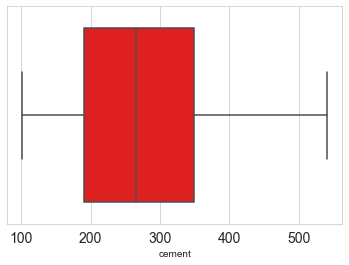

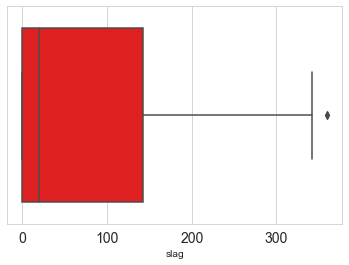

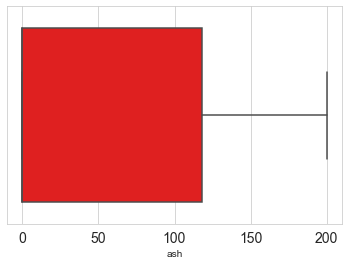

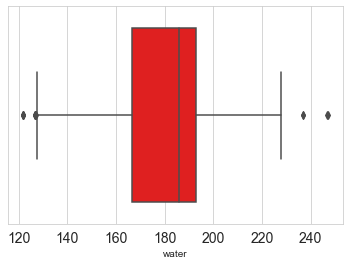

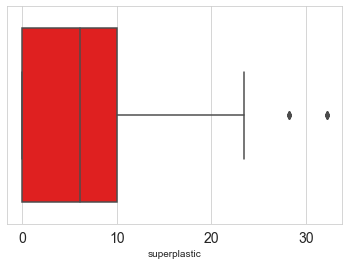

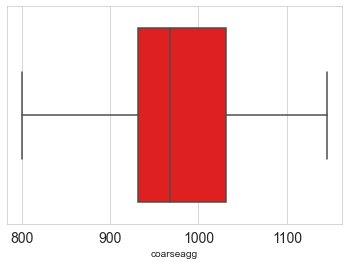

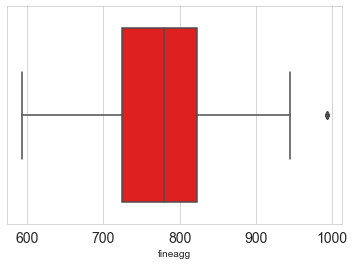

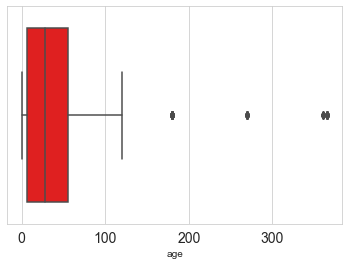

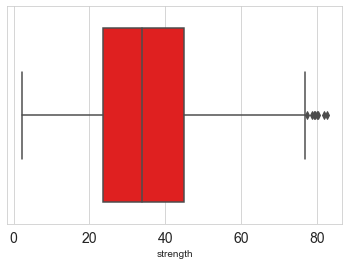

In [53]:
# Show distributions of different attributes
for x in List:
    sns.boxplot(df[x], color ='r')
    plt.show()

In [54]:
# Plot concrete age 
# ax1 = sns.boxplot(df['age'], orient="h", palette="Set2")
# ax1.set(xlabel='Age (Days)')
# ax1.xaxis.label.set_size(16)

In [55]:
# Plot concrete compressive strength
# ax2 = sns.boxplot(df['strength'], orient="h", palette="Set1")
# ax2.set(xlabel='Compressive Strength (MPa)')
# ax2.xaxis.label.set_size(16)

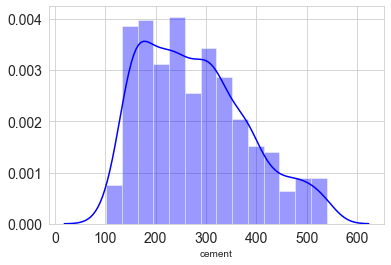

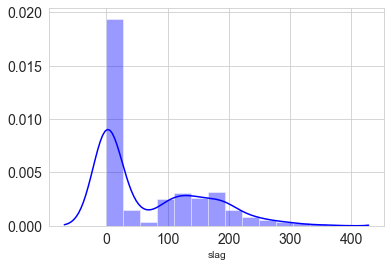

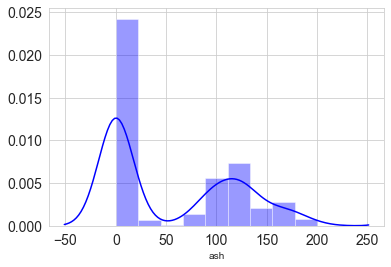

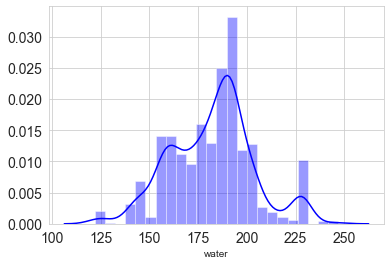

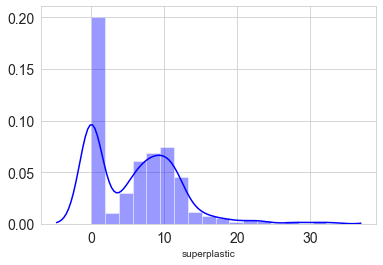

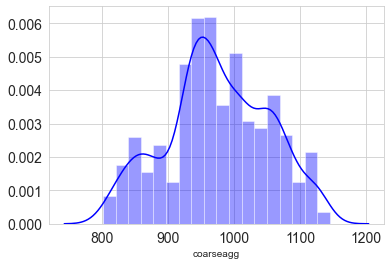

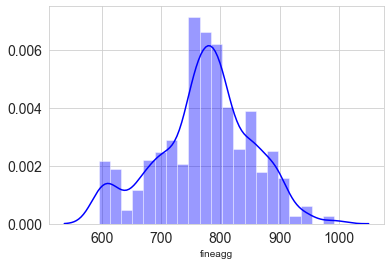

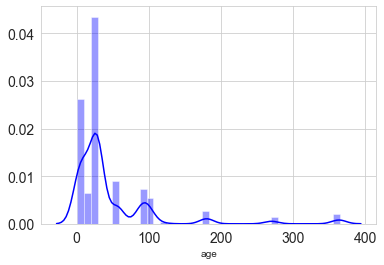

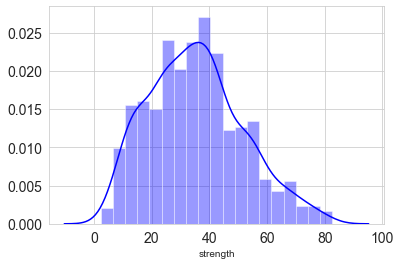

In [56]:
# Show distributions of different attributes
for x in List:
    sns.distplot(df[x], color ='b')
    plt.show()

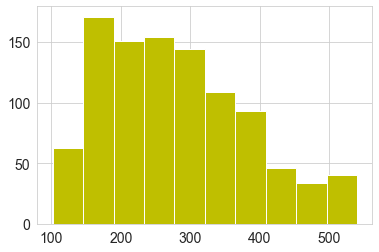

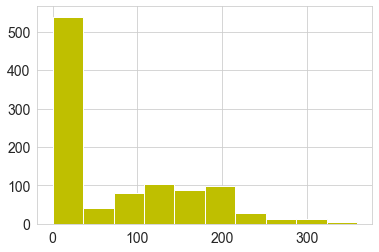

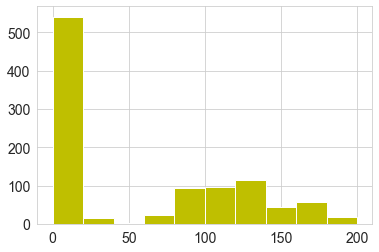

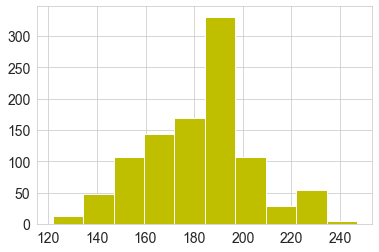

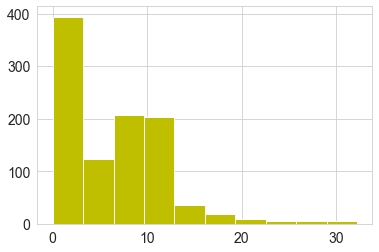

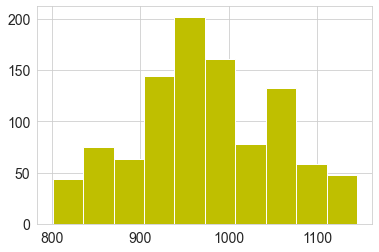

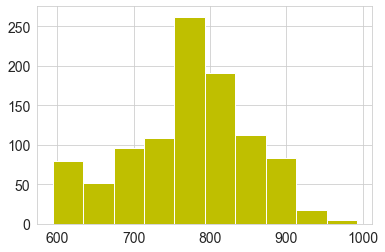

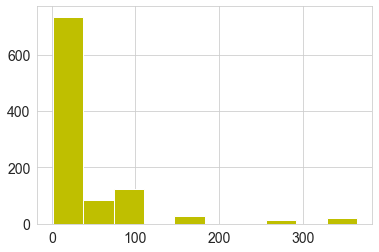

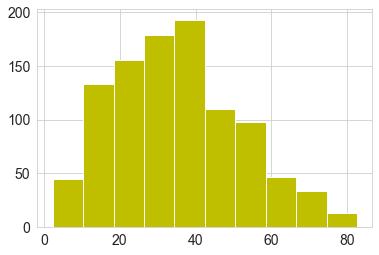

In [57]:
# Show histogram of different attributes
for x in List:
    plt.hist(df[x], color ='y')
    plt.show()

## Insight: 
Regression analysis need to be applied to the concrete compressive strength prediction. The outliers of the age and ingredients may cause the outliers in the compressive strength. We need to check whether the outliers are in the same observations.

In [58]:
# statistic Summary
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [59]:
# Print the outliers in compressive strength and check the corresponding input variables for ingredients and age
Q1 = df[x].quantile(0.25)
Q3 = df[x].quantile(0.75)
IQR = Q3 - Q1 
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df[df['strength'] > upper]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
190,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
245,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
257,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
506,451.0,0.0,0.0,165.0,11.3,1030.0,745.0,28,78.80
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


In [60]:
df[df['strength'] < lower]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


## Insight: 
The ingredients are with the extreme values of some of the properties, such as ash, cement and sloag content. We need to keep the outliers in this study, as the special distribution of the ingredients may cause the outliers in the strength

## b. Bivariate analysis (10 marks)

- Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves.

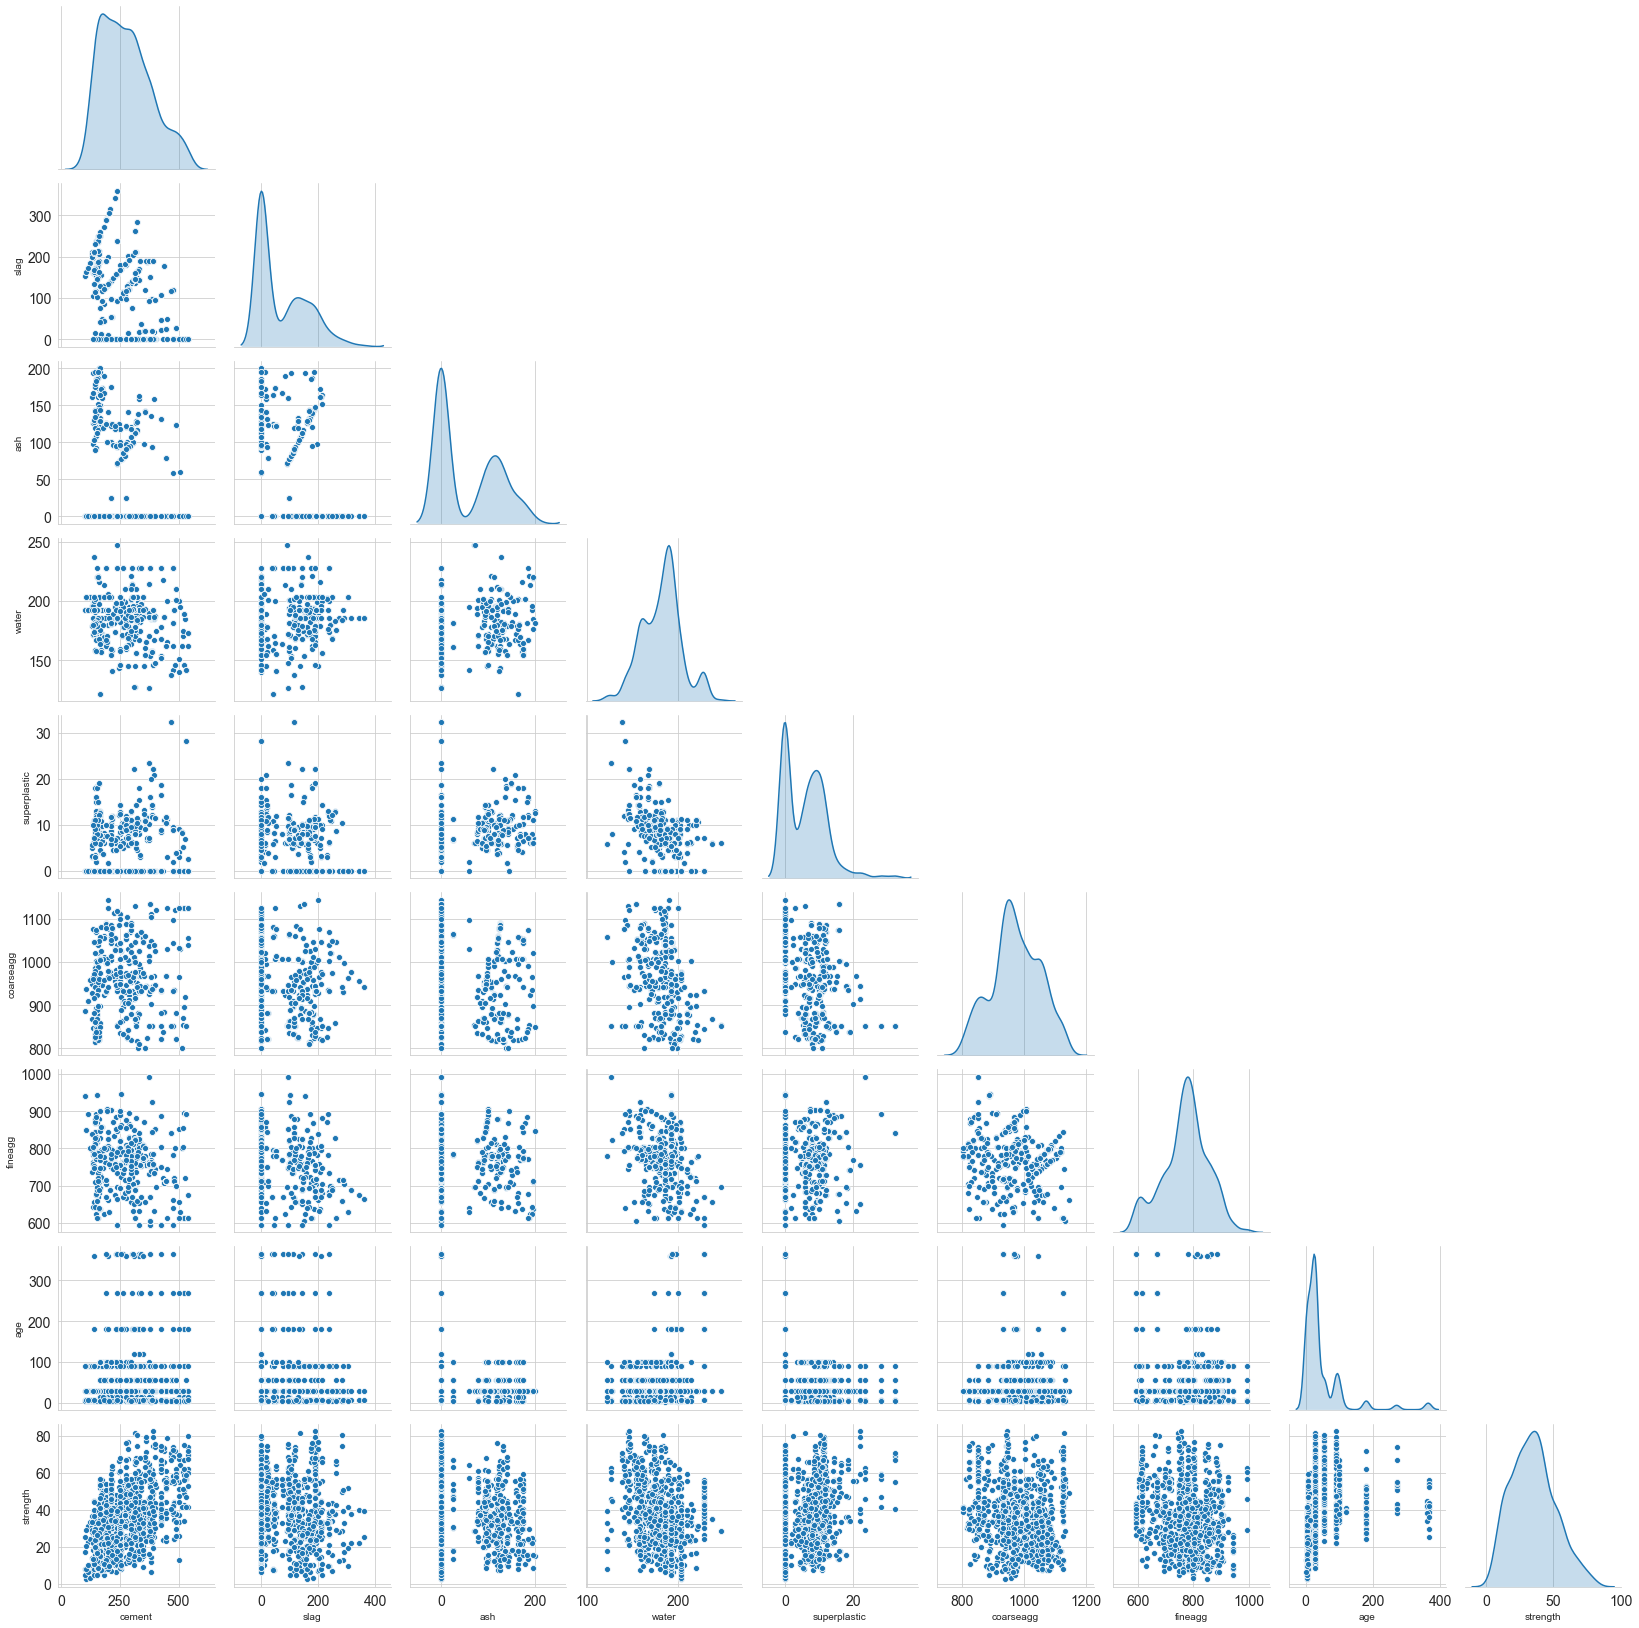

In [61]:
sns.pairplot(df,diag_kind='kde',corner=True)                             # Pair Plots
plt.show()

In [62]:
df.corr()                            #print the correlation table

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


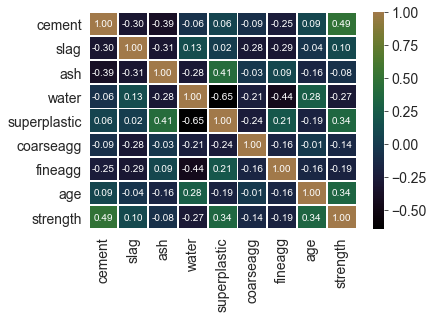

In [63]:
sns.heatmap(df.corr(),annot=True, linewidths=1, fmt= '.2f', center = 1,cmap="cubehelix" )  # heatmap
plt.show()

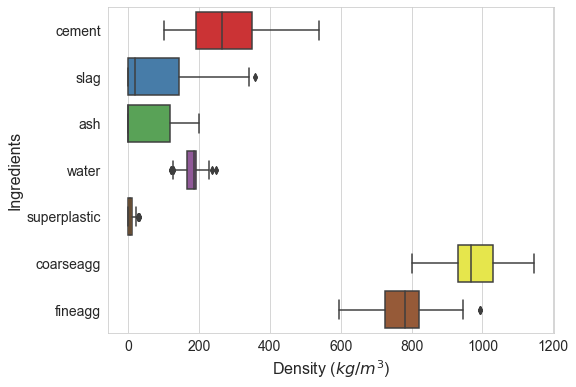

In [64]:
# Print the box plots of all concrete ingredients in the same graph
plt.rc('xtick', labelsize=14)                           # fontsize of the tick labels
plt.rc('ytick', labelsize=14)                           # fontsize of the tick labels
df1 = df.drop(columns=['age', 'strength'])         
sns.set_style('whitegrid')
ax = sns.boxplot(data=df1, orient="h", palette="Set1")
ax.set(xlabel='Density ($kg/m^3$)', ylabel='Ingredients')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
fig = plt.gcf()
fig.set_size_inches(8, 6)

## Insight: 
- Based on the physical meanings, the ingredients should be independent of each other. But the correlation table shows some correlations between different ingredients.
- Age should be independent. However, the heatmap seems not an independent parameter to the ingredients. The heatmap showed some correlations.
-  Strength is positively correlated with age, cement, slag and superplastic content, negatively correlated with coarse and fine aggregate contents, water and ash content. 

## c. Feature Engineering techniques(10 marks)

- Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
- Get the data model ready and do a train test split.
- Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.


### - Identify opportunities to extract new features from existing data

## Insight: 
- Concrete mixing is based on certain ratio. New features can be obtained by the relative ratios

In [65]:
df0= df.copy()

In [66]:
for x in ['cement','slag', 'ash', 'water', 'superplastic','coarseagg','fineagg']:
    df0[x] = df0[x]/df['water']
df0

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.694349,1.041769,0.000000,1.0,0.000000,4.775430,3.678133,28,29.89
1,1.066961,0.266582,0.785218,1.0,0.068225,6.827543,5.029690,14,23.51
2,1.334045,0.000000,0.510672,1.0,0.029349,5.106190,4.595518,28,29.22
3,1.166667,0.500000,0.000000,1.0,0.000000,4.087719,2.938596,28,45.85
4,0.800828,0.948784,0.000000,1.0,0.047077,5.418520,3.604242,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,0.750000,0.000000,0.922222,1.0,0.055556,5.338889,4.472222,28,13.29
1026,3.746827,0.000000,0.000000,1.0,0.198872,6.009168,6.302539,3,41.30
1027,1.538976,0.645880,0.502784,1.0,0.049555,4.844655,4.277840,28,44.28
1028,1.500000,0.166667,0.000000,1.0,0.000000,4.087719,2.938596,270,55.06


In [67]:
df0.drop('water',axis=1,inplace=True)

In [68]:
df0

,cement,slag,ash,superplastic,coarseagg,fineagg,age,strength
0,0.694349,1.041769,0.000000,0.000000,4.775430,3.678133,28,29.89
1,1.066961,0.266582,0.785218,0.068225,6.827543,5.029690,14,23.51
2,1.334045,0.000000,0.510672,0.029349,5.106190,4.595518,28,29.22
3,1.166667,0.500000,0.000000,0.000000,4.087719,2.938596,28,45.85
4,0.800828,0.948784,0.000000,0.047077,5.418520,3.604242,28,18.29
...,...,...,...,...,...,...,...,...
1025,0.750000,0.000000,0.922222,0.055556,5.338889,4.472222,28,13.29
1026,3.746827,0.000000,0.000000,0.198872,6.009168,6.302539,3,41.30
1027,1.538976,0.645880,0.502784,0.049555,4.844655,4.277840,28,44.28
1028,1.500000,0.166667,0.000000,0.000000,4.087719,2.938596,270,55.06


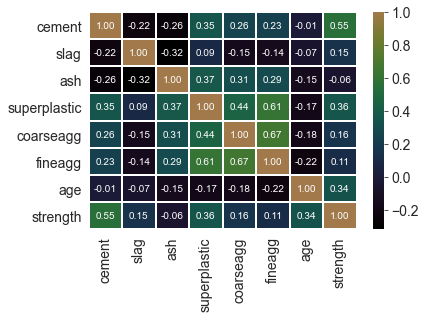

In [69]:
sns.heatmap(df0.corr(),annot=True, linewidths=1, fmt= '.2f', center = 1,cmap="cubehelix" )  # heatmap
plt.show()

### - Get the data model ready and do a train test split

In [70]:
# Prepare the input and output variables
X = df0.drop(['strength'], axis=1)
y = df0[['strength']]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1) 

In [71]:
# check whether the split is correct
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df0.index)) * 100))   
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df0.index)) * 100))

69.95% data is in training set
30.05% data is in test set


### - Check whether the linear regression model can be used? Decide on the complexity of the model

In [72]:
# invoke the LinearRegression function and find the bestfit model on training data
LRM = LinearRegression()
LRM.fit(X_train, y_train)

LinearRegression()

In [73]:
# Print the coefficients for every attribute
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LRM.coef_[0][idx]))

intercept = LRM.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for cement is 19.233146893728403
The coefficient for slag is 15.161162698649942
The coefficient for ash is 13.715569352352626
The coefficient for superplastic is 9.306831078999865
The coefficient for coarseagg is -0.13437768364854352
The coefficient for fineagg is -0.12588405132980388
The coefficient for age is 0.10445802308261812
The intercept for our model is -8.949247165255642


In [74]:
print("Linear Regression Model Training Accuracy:", LRM.score(X_train, y_train))                 #Training Accuracy 
print("Linear Regression Model Testing Accuracy:", LRM.score(X_test, y_test))                    #Testing Accuracy 

Linear Regression Model Training Accuracy: 0.6065386999820769
Linear Regression Model Testing Accuracy: 0.5484865904029925


In [75]:
y_predict = LRM.predict(X_test)
LRM_MSE = mean_squared_error(y_test, y_predict)
print("Linear Regression Model MSE:", LRM_MSE)
LRM_R2 = r2_score(y_test, y_predict)
print("Linear Regression Model ----- R2 Score:", LRM_R2)

Linear Regression Model MSE: 104.9209958454358
Linear Regression Model ----- R2 Score: 0.5484865904029925


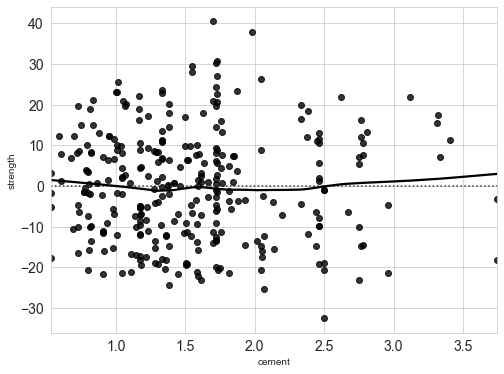

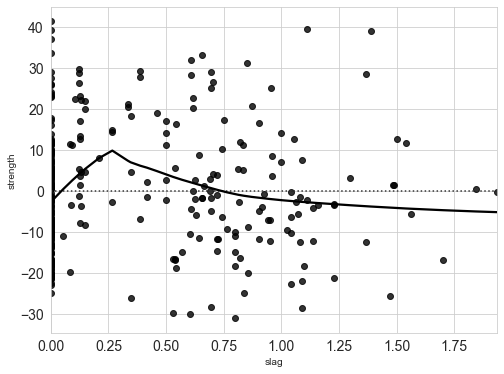

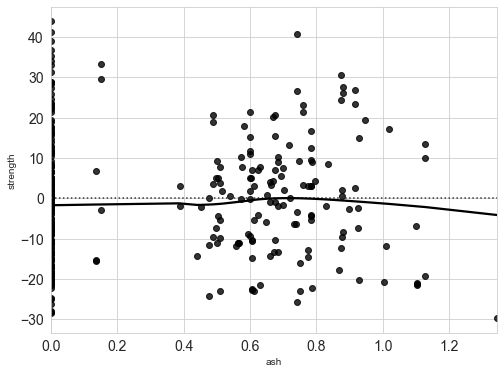

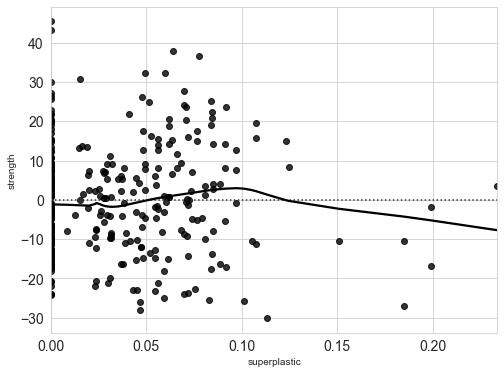

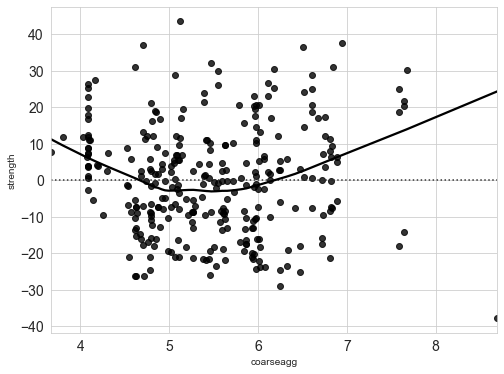

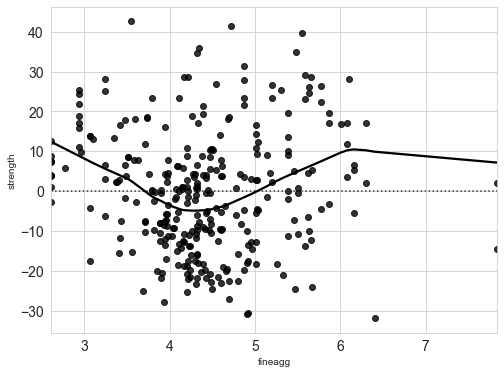

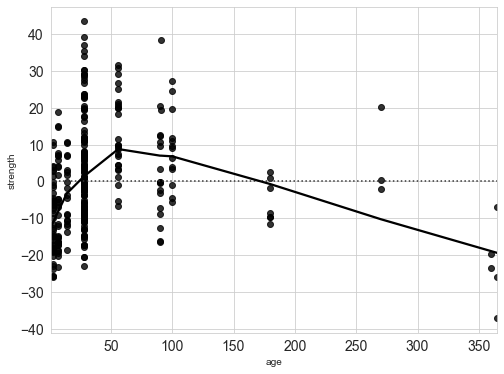

In [76]:
# Check the residuals for each predictor.
for x in X_train.columns.tolist():
    fig = plt.figure(figsize=(8,6))
    sns.residplot(x= X_test[x], y= y_test['strength'], color='black', lowess=True )
    plt.show()

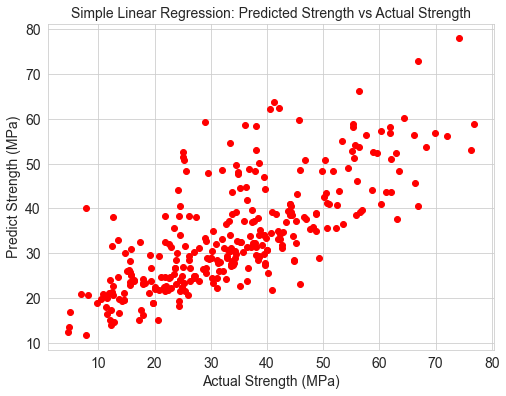

In [77]:
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_predict, color='Red')
plt.title('Simple Linear Regression: Predicted Strength vs Actual Strength', fontsize=14)
plt.ylabel('Predict Strength (MPa)', fontsize=14)
plt.xlabel('Actual Strength (MPa)', fontsize=14)
plt.show()

In [78]:
# Analyze using the statistical model
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,superplastic,coarseagg,fineagg,age,strength
443,1.142257,0.000000,0.751501,0.059424,6.476591,4.795318,56,31.72
689,1.175725,0.000000,0.606884,0.045290,6.077295,5.470411,56,33.96
1022,0.800885,0.000000,0.738938,0.061394,5.417588,4.488385,28,13.20
826,0.590199,0.692438,0.539501,0.024504,3.669624,2.769751,28,35.23
758,1.143948,0.000000,0.590482,0.044066,5.863690,5.298472,56,43.39


In [79]:
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept       -8.949247
cement          19.233147
slag            15.161163
ash             13.715569
superplastic     9.306831
coarseagg       -0.134378
fineagg         -0.125884
age              0.104458
dtype: float64

In [80]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          3.34e-136
Time:                        08:01:02   Log-Likelihood:                -2647.7
No. Observations:                 703   AIC:                             5311.
Df Residuals:                     695   BIC:                             5348.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.9492      3.508     -2.551   

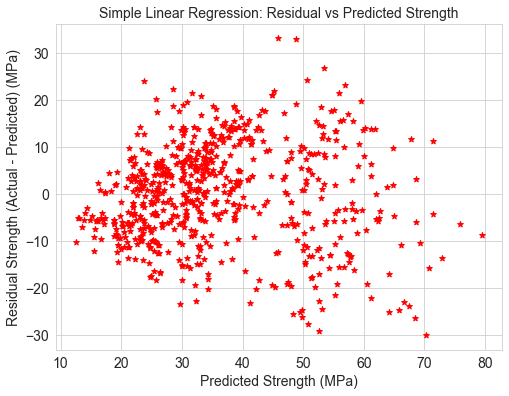

In [81]:
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(8,6))
plt.scatter(lm1.predict(), lm1.resid, marker='*', color ='red')
plt.title('Simple Linear Regression: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual Strength (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

Ridge model: [[19.2739967  15.21249014 13.78520086  6.01497677 -0.13133694 -0.04886411
   0.10445545]]
Ridge Linear Model Training Accuracy: 0.6065121772484229
Ridge Linear Model Testing Accuracy: 0.5485910657317827
Ridge Linear Regression Model MSE: 104.89671825964331


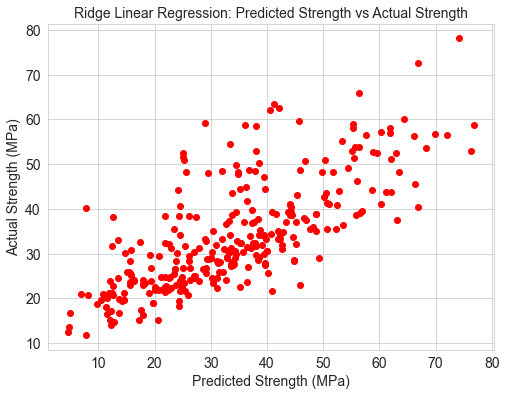

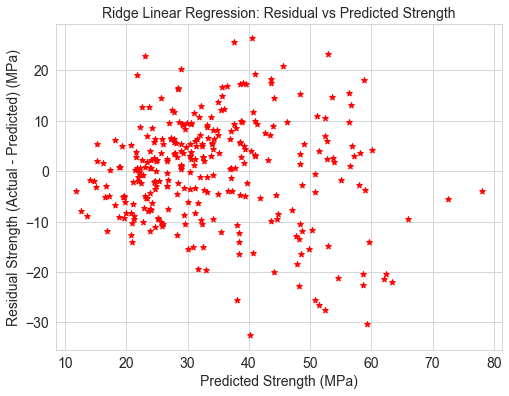

In [82]:
# Fitting the Ridge linear regression model with L2 regularization
ridge = Ridge(alpha=0.3)
ridge.fit(X_train,y_train)
y_ridge_pred = ridge.predict(X_test)
print ("Ridge model:", (ridge.coef_))
print("Ridge Linear Model Training Accuracy:", ridge.score(X_train, y_train))
print("Ridge Linear Model Testing Accuracy:", ridge.score(X_test, y_test))
ridge_MSE = mean_squared_error(y_test, y_ridge_pred)
print("Ridge Linear Regression Model MSE:", ridge_MSE)
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_ridge_pred, color='Red')
plt.title('Ridge Linear Regression: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
# Plot between residual(actual - predicted) and predicted values
residual = y_test -y_ridge_pred
plt.figure(figsize=(8,6))
plt.scatter(y_ridge_pred, residual['strength'], marker='*', color ='red')
plt.title('Ridge Linear Regression: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual Strength (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()


Lasso model: [1.81110009e+01 1.34012235e+01 1.10419683e+01 0.00000000e+00
 9.09213165e-02 9.46230186e-03 1.01131825e-01]
Lasso Linear Model Training Accuracy: 0.6016927168576002
Lasso Linear Model Testing Accuracy: 0.5438184727768532
Lasso Linear Regression Model MSE: 106.00575554392472


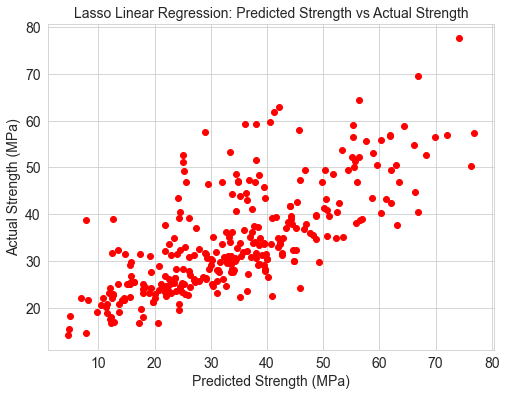

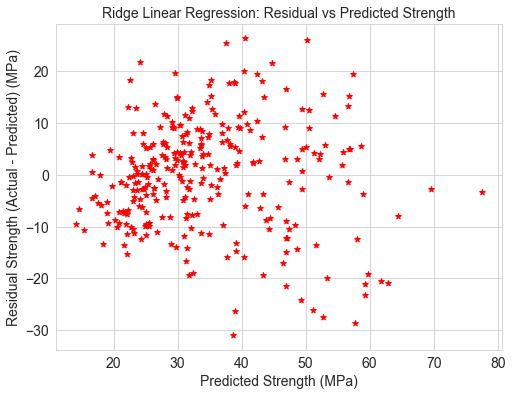

In [83]:
# Fitting the Lasso linear regression model with L1 regularization
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
y_lasso_pred = lasso.predict(X_test)
print ("Lasso model:", (lasso.coef_))
print("Lasso Linear Model Training Accuracy:", lasso.score(X_train, y_train))
print("Lasso Linear Model Testing Accuracy:", lasso.score(X_test, y_test))
lasso_MSE = mean_squared_error(y_lasso_pred, y_test)
print("Lasso Linear Regression Model MSE:", lasso_MSE)
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_lasso_pred, color='Red')
plt.title('Lasso Linear Regression: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
# Plot between residual(actual - predicted) and predicted values
residual = y_test['strength'] -y_lasso_pred
plt.figure(figsize=(8,6))
plt.scatter(y_lasso_pred, residual, marker='*', color ='red')
plt.title('Ridge Linear Regression: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual Strength (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

## Insight: 
Linear regression models, simple linear, Ridge and Lasso all show very low training and testing score. This model may be better represented by nonlinear models. The linear regression from the statistical model does not show a good result. 

Training Score: 0.7950940311573607
Testing Score: 0.7451901314347853
Simple Linear Regression Model with quadratic terms ----- MSE: 59.21176335597392


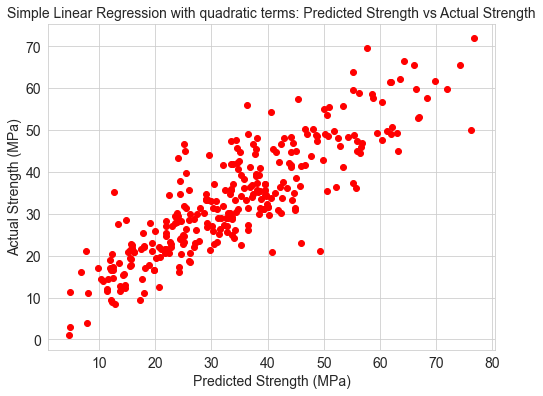

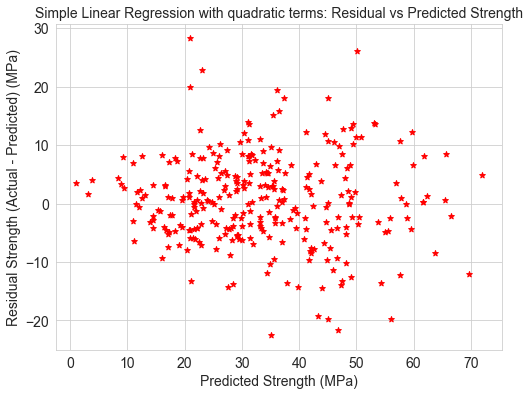

In [84]:
# Realize Quantradic Transformation and model fit using linear regression analysis
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
poly_clf = LinearRegression()
poly_clf.fit(X_train2, y_train)
y_poly_pred = poly_clf.predict(X_test2)
print("Training Score:",poly_clf.score(X_train2, y_train))
print("Testing Score:",poly_clf.score(X_test2, y_test))
poly_MSE = mean_squared_error(y_test,y_poly_pred)
print("Simple Linear Regression Model with quadratic terms ----- MSE:", poly_MSE)
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_poly_pred, color='Red')
plt.title('Simple Linear Regression with quadratic terms: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_poly_pred, y_test-y_poly_pred, marker='*', color ='red')
plt.title('Simple Linear Regression with quadratic terms: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual Strength (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

Ridge model with quadratic terms: [[ 0.00000000e+00  2.92633861e+01  2.63357915e+01  2.05617718e+01
   5.69808621e+00 -1.56139178e+00  7.83367282e+00  3.02960162e-01
  -3.08058806e+00 -3.88404709e+00 -6.00765787e+00 -3.35922230e+01
   9.48647806e-01  2.19470941e-01  7.50642524e-03 -5.87392572e+00
  -6.97469124e+00  1.03796092e+01 -2.32502674e+00  3.38300213e+00
   6.20983694e-02 -1.28928967e+01 -1.15789041e+01 -9.46180225e-01
   3.49451329e+00  1.13920655e-01 -4.79682224e+00  1.33236636e+01
  -3.70935921e+00  4.10212798e-01 -5.04742996e-01  1.44691464e+00
  -2.82414683e-02 -2.13326410e+00  2.62608230e-02 -6.56181199e-04]]
Ridge Linear Model with quadratic terms ----- Training Accuracy: 0.7856007548906958
Ridge Linear Model with quadratic terms ----- Testing Accuracy: 0.7479952204583881
Ridge Linear Regression Model with quadratic terms ----- MSE: 58.55992726974518


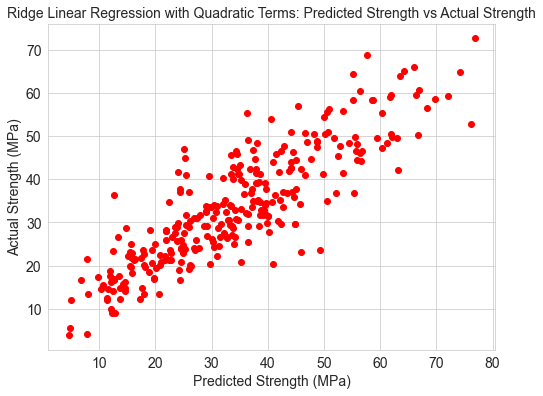

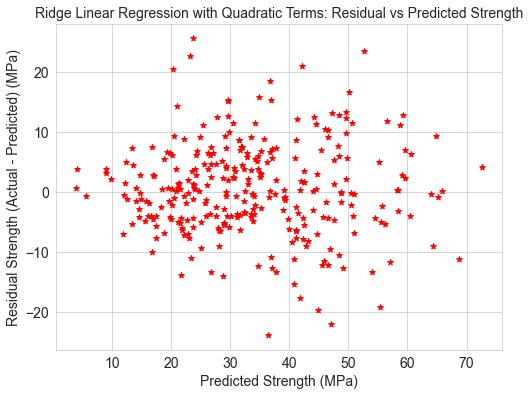

In [85]:
# Fitting the linear regression model with quadratic terms and L2 regularization
Poly_ridge = Ridge(alpha=.3)
Poly_ridge.fit(X_train2,y_train)
y_polyridge_pred = Poly_ridge.predict(X_test2)
print ("Ridge model with quadratic terms:", (Poly_ridge.coef_))
print("Ridge Linear Model with quadratic terms ----- Training Accuracy:", Poly_ridge.score(X_train2, y_train))
print("Ridge Linear Model with quadratic terms ----- Testing Accuracy:", Poly_ridge.score(X_test2, y_test))
polyridge_MSE = mean_squared_error(y_test,y_polyridge_pred)
print("Ridge Linear Regression Model with quadratic terms ----- MSE:", polyridge_MSE)
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_polyridge_pred, color='Red')
plt.title('Ridge Linear Regression with Quadratic Terms: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
# Plot between residual(actual - predicted) and predicted values
residual = y_test -y_polyridge_pred
plt.figure(figsize=(8,6))
plt.scatter(y_polyridge_pred, residual['strength'], marker='*', color ='red')
plt.title('Ridge Linear Regression with Quadratic Terms: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual Strength (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

Lasso model with quadratic terms: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.47107063e-01
 -0.00000000e+00  6.53993754e-01  0.00000000e+00 -0.00000000e+00
  3.16450998e+00  0.00000000e+00  3.63618032e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.42693698e+00
  8.91595582e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.83693653e+00  1.73189630e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -8.31190766e-02 -6.25740564e-01  6.17656011e-01
 -3.94572128e-02 -8.23933711e-01  3.95873809e-02 -6.46254459e-04]
Lasso Linear Model with quadratic terms ----- Training Accuracy: 0.7428150139994927
Lasso Linear Model with quadratic terms ----- Testing Accuracy: 0.7207259425143095
Lasso Linear Regression Model with quadratic terms ----- MSE: 64.89665999365776


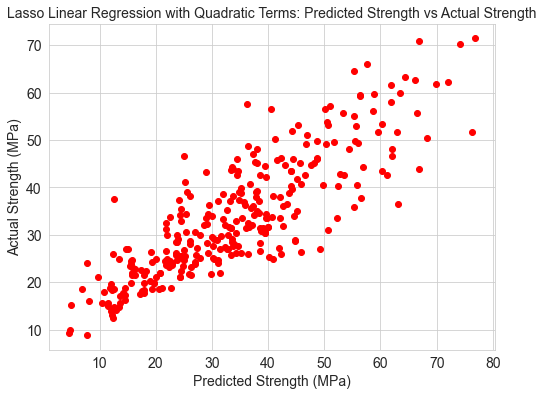

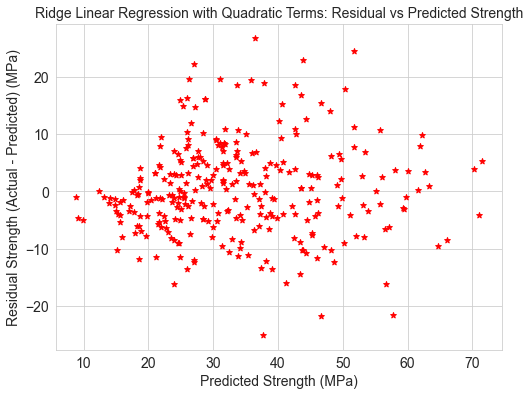

In [86]:
# Fitting the linear regression model with quadratic terms and L1 regularization
Poly_lasso = Lasso(alpha=.2)
Poly_lasso.fit(X_train2,y_train)
y_polylasso_pred = Poly_lasso.predict(X_test2)
print ("Lasso model with quadratic terms:", (Poly_lasso.coef_))
print("Lasso Linear Model with quadratic terms ----- Training Accuracy:", Poly_lasso.score(X_train2, y_train))
print("Lasso Linear Model with quadratic terms ----- Testing Accuracy:", Poly_lasso.score(X_test2, y_test))
polylasso_MSE = mean_squared_error(y_test, y_polylasso_pred)
print("Lasso Linear Regression Model with quadratic terms ----- MSE:", polylasso_MSE)
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_polylasso_pred, color='Red')
plt.title('Lasso Linear Regression with Quadratic Terms: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
#  Plot between residual(actual - predicted) and predicted values
residual = y_test['strength'] -y_polylasso_pred
plt.figure(figsize=(8,6))
plt.scatter(y_polylasso_pred, residual, marker='*', color ='red')
plt.title('Ridge Linear Regression with Quadratic Terms: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual Strength (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

# Insight: 
Simple linear regression using quadratic terms (including simple model, regularization using Ridge or Lasso models) shows better training and testing score. ~0.80 training score and ~0.75 testing score. 

In [87]:
# Realize Polynomial Transformation and model fit using linear regression analysis with hyperparameter tuning through pipeline
num_folds = 5
kfold = KFold(n_splits=num_folds)

Accuracy_mean = np.zeros(4)
Accuracy_std = np.zeros(4)

for degree_k in range(1,5,1):
    pipeline = Pipeline([
              ('scl', StandardScaler()),
              ('Poly',PolynomialFeatures(degree=degree_k)),
              ('LRM', LinearRegression())
    ])
    results = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=kfold)
    print("Results of polynomial degree:", degree_k)
    print(results)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100))
    Accuracy_mean[degree_k-1] = results.mean()
    Accuracy_std[degree_k-1] = results.std()

Results of polynomial degree: 1
[0.58742748 0.55481818 0.6643774  0.56317999 0.5756529 ]
Accuracy: 58.909% (3.924%)
Results of polynomial degree: 2
[0.74259962 0.71848087 0.81219611 0.77691767 0.75568906]
Accuracy: 76.118% (3.178%)
Results of polynomial degree: 3
[0.75390437 0.74714799 0.84923837 0.84549487 0.73194877]
Accuracy: 78.555% (5.099%)
Results of polynomial degree: 4
[-15.96221082 -40.53265722   0.05996792  -3.33331776  -6.72109081]
Accuracy: -1329.786% (1462.744%)


In [88]:
#plt.errorbar(range(1,4,1), Accuracy_mean[0:3], Accuracy_std[0:3], marker='s', mfc='red',
#         mec='red', color='red', ms=5, mew=4)
#plt.title('Linear Regression Model Accuracy', fontsize=14)
#plt.ylabel('Model Accuracy', fontsize=14)
#plt.xlabel('Polynomial Degree n', fontsize=14)
#plt.ylim(ymin = 0.5, ymax = 1)
#plt.show()

Best model with polynomial degree: 3
Testing Accuracy: 0.8389664724110295


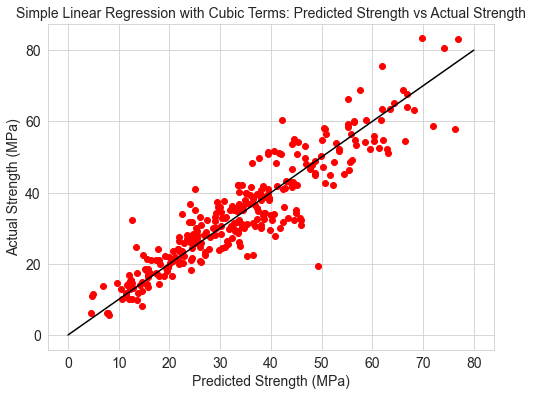

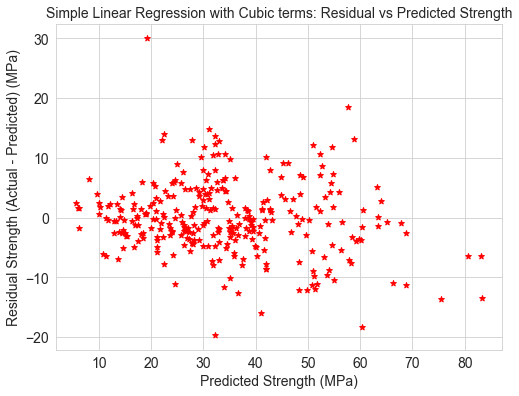

In [89]:
degree_k = 3
pipeline = Pipeline([
              ('scl', StandardScaler()),
              ('Poly',PolynomialFeatures(degree=degree_k)),
              ('LRM', LinearRegression())
    ])
pipeline.fit(X_train, y_train)
y_pred_ll = pipeline.predict(X_test)
print('Best model with polynomial degree:', degree_k)
print('Testing Accuracy:', pipeline.score(X_test, y_test))
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_pred_ll, color='Red')
plt.plot([0,80],[0,80], color='black')
plt.title('Simple Linear Regression with Cubic Terms: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_pred_ll, y_test-y_pred_ll, marker='*', color ='red')
plt.title('Simple Linear Regression with Cubic terms: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual Strength (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

In [90]:
# Realize Polynomial Transformation and model fit using Simple linear regression analysis with hyperparameter tuning through pipeline

pipe_LRM = Pipeline([
              ('scl', StandardScaler()),
              ('Poly',PolynomialFeatures()),
              ('LRM', LinearRegression())
    ])

param_grid = {'Poly__degree':[1,2,3,4,5]} 
grid_LRM = GridSearchCV( pipe_LRM , param_grid = param_grid, cv = 5) 

grid_LRM.fit(X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_LRM.best_score_)) 
print(" Best parameters: ", grid_LRM.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_LRM.score( X_test, y_test)))

 Best cross-validation accuracy: 0.79
 Best parameters:  {'Poly__degree': 3}
 Test set accuracy: 0.84


In [91]:
# Realize Polynomial Transformation and model fit using Ridge linear regression analysis with hyperparameter tuning through pipeline

pipe_rg = Pipeline([
              ('scl', StandardScaler()),
              ('Poly',PolynomialFeatures()),
              ('Rg', Ridge())])

param_grid = {'Poly__degree':[1,2,3,4,5],'Rg__alpha':[0.03, 0.1, 0.3, 1, 3]} 
grid_rg = GridSearchCV( pipe_rg , param_grid = param_grid, cv = 5) 

grid_rg.fit(X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_rg.best_score_)) 
print(" Best parameters: ", grid_rg.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_rg.score( X_test, y_test)))

 Best cross-validation accuracy: 0.81
 Best parameters:  {'Poly__degree': 3, 'Rg__alpha': 3}
 Test set accuracy: 0.85


In [92]:
# Realize Polynomial Transformation and model fit using Lasso linear regression analysis with hyperparameter tuning through pipeline

pipe_las = Pipeline([
              ('scl', StandardScaler()),
              ('Poly',PolynomialFeatures()),
              ('Las', Lasso())])

param_grid = {'Poly__degree':[1,2,3,4,5],'Las__alpha':[0.03, 0.1, 0.3, 1, 3]} 
grid_ls = GridSearchCV( pipe_las , param_grid = param_grid, cv = 5) 

grid_ls.fit(X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_ls.best_score_)) 
print(" Best parameters: ", grid_ls.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_ls.score( X_test, y_test)))

 Best cross-validation accuracy: 0.85
 Best parameters:  {'Las__alpha': 0.03, 'Poly__degree': 4}
 Test set accuracy: 0.84


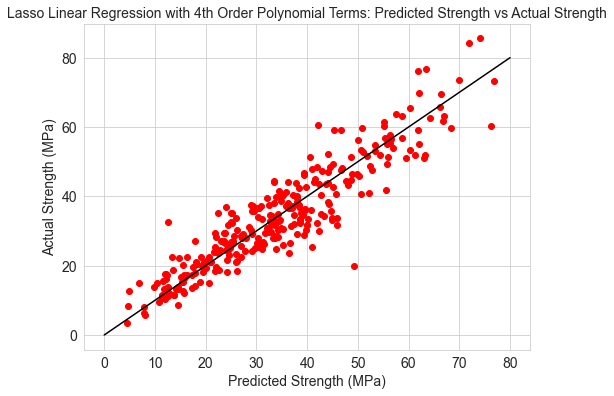

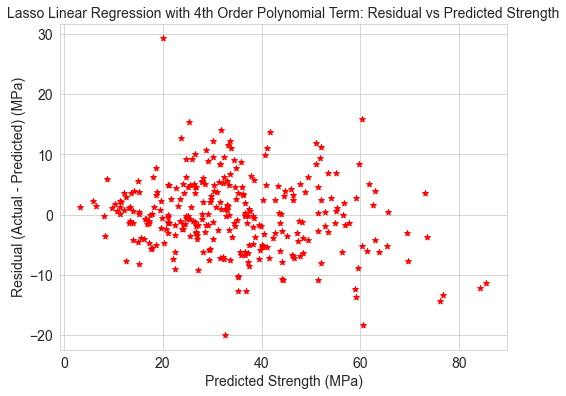

In [93]:
y_pred_las = grid_ls.predict(X_test)
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_pred_las, color='Red')
plt.plot([0,80],[0,80], color='black')
plt.title('Lasso Linear Regression with 4th Order Polynomial Terms: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_pred_las, y_test['strength']-y_pred_las, marker='*', color ='red')
plt.title('Lasso Linear Regression with 4th Order Polynomial Term: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

In [94]:
grid_ls.cv_results_['params']

[{'Las__alpha': 0.03, 'Poly__degree': 1},
 {'Las__alpha': 0.03, 'Poly__degree': 2},
 {'Las__alpha': 0.03, 'Poly__degree': 3},
 {'Las__alpha': 0.03, 'Poly__degree': 4},
 {'Las__alpha': 0.03, 'Poly__degree': 5},
 {'Las__alpha': 0.1, 'Poly__degree': 1},
 {'Las__alpha': 0.1, 'Poly__degree': 2},
 {'Las__alpha': 0.1, 'Poly__degree': 3},
 {'Las__alpha': 0.1, 'Poly__degree': 4},
 {'Las__alpha': 0.1, 'Poly__degree': 5},
 {'Las__alpha': 0.3, 'Poly__degree': 1},
 {'Las__alpha': 0.3, 'Poly__degree': 2},
 {'Las__alpha': 0.3, 'Poly__degree': 3},
 {'Las__alpha': 0.3, 'Poly__degree': 4},
 {'Las__alpha': 0.3, 'Poly__degree': 5},
 {'Las__alpha': 1, 'Poly__degree': 1},
 {'Las__alpha': 1, 'Poly__degree': 2},
 {'Las__alpha': 1, 'Poly__degree': 3},
 {'Las__alpha': 1, 'Poly__degree': 4},
 {'Las__alpha': 1, 'Poly__degree': 5},
 {'Las__alpha': 3, 'Poly__degree': 1},
 {'Las__alpha': 3, 'Poly__degree': 2},
 {'Las__alpha': 3, 'Poly__degree': 3},
 {'Las__alpha': 3, 'Poly__degree': 4},
 {'Las__alpha': 3, 'Poly__deg

In [95]:
grid_ls.cv_results_['mean_test_score']

array([0.58971141, 0.76391694, 0.8417495 , 0.85045521, 0.68392098,
       0.59038777, 0.76377497, 0.84104431, 0.84676261, 0.79690227,
       0.58839294, 0.7510472 , 0.81299228, 0.82291208, 0.83119526,
       0.55609433, 0.69490011, 0.69564111, 0.70617159, 0.67731237,
       0.41964069, 0.41964069, 0.40799145, 0.4116161 , 0.38600142])

In [96]:
grid_ls.cv_results_['std_test_score']

array([0.03897563, 0.0332166 , 0.03274214, 0.03145245, 0.14768586,
       0.03856359, 0.03553035, 0.02419331, 0.03893437, 0.03767359,
       0.03715519, 0.04111879, 0.0309785 , 0.04214495, 0.03998194,
       0.03698916, 0.03951457, 0.04266374, 0.04518914, 0.0658044 ,
       0.03477461, 0.03477461, 0.03025072, 0.03512723, 0.03589081])

In [97]:
# plt.plot([1,2,3,4,5], [0.60028053, 0.77202292, 0.84561732, 0.86144588, 0.78044318],[0.04123842, 0.0346884 , 0.03205348, 0.03192298, 0.07021898], marker='s', mfc='red',
#         mec='red', color='red', ms=5, mew=4)
# plt.title('Linear Regression Model Accuracy', fontsize=14)
# plt.ylabel('Model Accuracy', fontsize=14)
# plt.xlabel('Polynomial Degree n', fontsize=14)
# plt.ylim(ymin = 0.5, ymax = 1)
# plt.show()

## Insight: 
The simple linear regression with cubic terms offers the better model accuracy. However, the accuracy does not meet the requirement of 85%. In the following, we will try other regression methods. 

Higher order polynomial has to be used. Particular for linear Lasso model, 4th order required to get a better accuracy (R2_score).

## Deliverable – 2 (Creating the Model and Tuning It)  (30 marks)
- Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)


In [191]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [192]:
num_folds = 10
seed = 77

In [193]:
kfold = KFold(n_splits=num_folds, random_state=seed)

###### Random Forest Regressor

In [194]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=1)
rfm=rf.fit(X_train, y_train)
results_rf = cross_val_score(rfm,X, y, cv=kfold)
results_rf

array([0.8366485 , 0.91988027, 0.95146648, 0.90757552, 0.88247668,
       0.91647848, 0.93784798, 0.88010026, 0.91124521, 0.92073512])

In [195]:
results_rf.mean()

0.9064454511057175

In [196]:
results_rf.std()

0.031085146673482774

In [197]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Random Frest Regressor'], 'mean': results_rf.mean(), 
                          'standard deviation': results_rf.std()})
resultsDf = resultsDf[['Method', 'mean','standard deviation']]
resultsDf

,Method,mean,standard deviation
0,Random Frest Regressor,0.906445,0.031085


###### Gradient Boosting Regressor

In [198]:
from sklearn.ensemble import GradientBoostingRegressor
gbR = GradientBoostingRegressor(n_estimators=100,random_state=1)
gbRm=bg.fit(X_train, y_train)
results_gbR = cross_val_score(gbRm,X, y, cv=kfold)
results_gbR

array([0.83740584, 0.91717413, 0.95273154, 0.90844939, 0.88225112,
       0.91754004, 0.93660004, 0.8799274 , 0.91242106, 0.91944351])

In [199]:
results_gbR.mean()

0.9063944071458495

In [200]:
results_gbR.std()

0.030908871838208937

In [201]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoostingRegressor'], 'mean': results_gbR.mean(),
                             'standard deviation':results_gbR.std()})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,mean,standard deviation
0,Random Frest Regressor,0.906445,0.031085
0,GradientBoostingRegressor,0.906394,0.030909


###### bagging Regressor

In [202]:
from sklearn.ensemble import BaggingRegressor
bg = BaggingRegressor(n_estimators=100,random_state=1)
bgm=bg.fit(X_train, y_train)
results_bg = cross_val_score(bgm,X, y, cv=kfold)
results_bg

array([0.83740584, 0.91717413, 0.95273154, 0.90844939, 0.88225112,
       0.91754004, 0.93660004, 0.8799274 , 0.91242106, 0.91944351])

In [203]:
results_bg.mean()

0.9063944071458495

In [204]:
results_bg.std()

0.030908871838208937

In [205]:
tempResultsDf = pd.DataFrame({'Method':['BaggingRegressor'], 'mean': results_bg.mean(),
                             'standard deviation':results_bg.std()})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,mean,standard deviation
0,Random Frest Regressor,0.906445,0.031085
0,GradientBoostingRegressor,0.906394,0.030909
0,BaggingRegressor,0.906394,0.030909


##### Adaboost Regressor

In [207]:
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor(n_estimators=200,random_state=1, learning_rate=1)
adm=ad.fit(X_train, y_train)
results_ad = cross_val_score(adm,X, y, cv=kfold)
results_ad

array([0.72989263, 0.80712412, 0.8532651 , 0.7447496 , 0.76435206,
       0.78951257, 0.78645055, 0.73904425, 0.78824602, 0.7957713 ])

In [208]:
results_ad.mean()

0.7798408191930193

In [209]:
results_ad.std()

0.034968041178899054

In [210]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoostRegressor'], 'mean': results_ad.mean(),
                             'standard deviation':results_bg.std()})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,mean,standard deviation
0,Random Frest Regressor,0.906445,0.031085
0,GradientBoostingRegressor,0.906394,0.030909
0,BaggingRegressor,0.906394,0.030909
0,AdaBoostRegressor,0.779841,0.030909


###### MLPRegressor       #Test RUN NN regressor, but result is not good

In [211]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(20, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                   learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                   max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, 
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
NN=mlp.fit(X_train, y_train)
results_NN = cross_val_score(mlp,X, y, cv=kfold)
results_NN

array([0.74289416, 0.80015052, 0.87008986, 0.77536441, 0.82453735,
       0.82494195, 0.83044781, 0.77749547, 0.72164292, 0.80852704])

In [212]:
results_NN.mean()

0.7976091494853969

In [213]:
results_NN.std()

0.04194482795983397

In [214]:
tempResultsDf = pd.DataFrame({'Method':['MLPRegressor'], 'mean': results_NN.mean(),
                             'standard deviation':results_NN.std()})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,mean,standard deviation
0,Random Frest Regressor,0.906445,0.031085
0,GradientBoostingRegressor,0.906394,0.030909
0,BaggingRegressor,0.906394,0.030909
0,AdaBoostRegressor,0.779841,0.030909
0,MLPRegressor,0.797609,0.041945


- Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

### Random Forest Regressor Tunning

In [215]:
# Random Forest Regressor with Gridsearch
pipe_rfr = Pipeline([
              ('scl', StandardScaler()),
              ('rfr', RandomForestRegressor(random_state=1))])

param_grid = {'rfr__n_estimators':[20, 40,60, 80, 100],
              'rfr__min_samples_split': [2,4,8,10],
              'rfr__max_features': ["auto", "sqrt", "log2"],
              'rfr__bootstrap': [True, False],
              'rfr__min_samples_leaf': [1,2,4,8],
              
             }    # 'rfr__max_depth':[1,2,3,4,5,6,7] not very helpful          
grid_rfr = GridSearchCV( pipe_rfr , param_grid = param_grid, cv = 10) 

grid_rfr.fit(X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_rfr.best_score_)) 
print(" Best parameters: ", grid_rfr.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_rfr.score( X_test, y_test)))

 Best cross-validation accuracy: 0.90
 Best parameters:  {'rfr__bootstrap': True, 'rfr__max_features': 'auto', 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 100}
 Test set accuracy: 0.89


In [217]:
grid_rfr.cv_results_['params']

[{'rfr__bootstrap': True,
  'rfr__max_features': 'auto',
  'rfr__min_samples_leaf': 1,
  'rfr__min_samples_split': 2,
  'rfr__n_estimators': 20},
 {'rfr__bootstrap': True,
  'rfr__max_features': 'auto',
  'rfr__min_samples_leaf': 1,
  'rfr__min_samples_split': 2,
  'rfr__n_estimators': 40},
 {'rfr__bootstrap': True,
  'rfr__max_features': 'auto',
  'rfr__min_samples_leaf': 1,
  'rfr__min_samples_split': 2,
  'rfr__n_estimators': 60},
 {'rfr__bootstrap': True,
  'rfr__max_features': 'auto',
  'rfr__min_samples_leaf': 1,
  'rfr__min_samples_split': 2,
  'rfr__n_estimators': 80},
 {'rfr__bootstrap': True,
  'rfr__max_features': 'auto',
  'rfr__min_samples_leaf': 1,
  'rfr__min_samples_split': 2,
  'rfr__n_estimators': 100},
 {'rfr__bootstrap': True,
  'rfr__max_features': 'auto',
  'rfr__min_samples_leaf': 1,
  'rfr__min_samples_split': 4,
  'rfr__n_estimators': 20},
 {'rfr__bootstrap': True,
  'rfr__max_features': 'auto',
  'rfr__min_samples_leaf': 1,
  'rfr__min_samples_split': 4,
  'rf

In [218]:
grid_rfr.cv_results_['mean_test_score']

array([0.89899172, 0.89965651, 0.90108272, 0.90128381, 0.90213014,
       0.89683871, 0.89738326, 0.8985404 , 0.89831744, 0.8996946 ,
       0.88787506, 0.88741913, 0.88851857, 0.88911884, 0.89018231,
       0.88308494, 0.88234512, 0.88364395, 0.88386789, 0.88478241,
       0.89005047, 0.88971585, 0.89114023, 0.89182783, 0.89287756,
       0.89005047, 0.88971585, 0.89114023, 0.89182783, 0.89287756,
       0.88385737, 0.88309707, 0.88428967, 0.88484028, 0.88589367,
       0.88021021, 0.87929504, 0.88055953, 0.88072906, 0.88156648,
       0.87597595, 0.8769581 , 0.87783133, 0.8776126 , 0.87830239,
       0.87597595, 0.8769581 , 0.87783133, 0.8776126 , 0.87830239,
       0.87597595, 0.8769581 , 0.87783133, 0.8776126 , 0.87830239,
       0.87382845, 0.87397613, 0.87496378, 0.87465657, 0.8753657 ,
       0.848309  , 0.84862555, 0.85022964, 0.85040522, 0.85126028,
       0.848309  , 0.84862555, 0.85022964, 0.85040522, 0.85126028,
       0.848309  , 0.84862555, 0.85022964, 0.85040522, 0.85126

In [219]:
grid_rfr.cv_results_['std_test_score']

array([0.02681763, 0.02726645, 0.0254426 , 0.02500934, 0.02630039,
       0.02833322, 0.02769292, 0.02649346, 0.02612043, 0.02695268,
       0.03115896, 0.03064215, 0.02933839, 0.02884775, 0.02956117,
       0.0316361 , 0.03159181, 0.02994541, 0.02924737, 0.03016171,
       0.03196236, 0.03005829, 0.02879776, 0.02803702, 0.02875045,
       0.03196236, 0.03005829, 0.02879776, 0.02803702, 0.02875045,
       0.0332418 , 0.03264641, 0.03110596, 0.03028448, 0.03077726,
       0.03401392, 0.03367823, 0.03178709, 0.03107129, 0.03155295,
       0.03554625, 0.03535333, 0.03365551, 0.03306602, 0.0330636 ,
       0.03554625, 0.03535333, 0.03365551, 0.03306602, 0.0330636 ,
       0.03554625, 0.03535333, 0.03365551, 0.03306602, 0.0330636 ,
       0.03624344, 0.03573658, 0.03400971, 0.0336692 , 0.03355093,
       0.03827387, 0.03663943, 0.03626167, 0.03591329, 0.03552291,
       0.03827387, 0.03663943, 0.03626167, 0.03591329, 0.03552291,
       0.03827387, 0.03663943, 0.03626167, 0.03591329, 0.03552

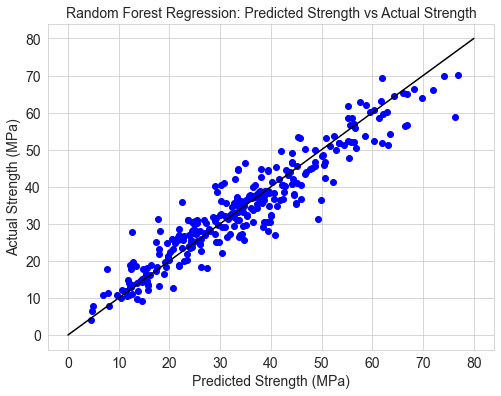

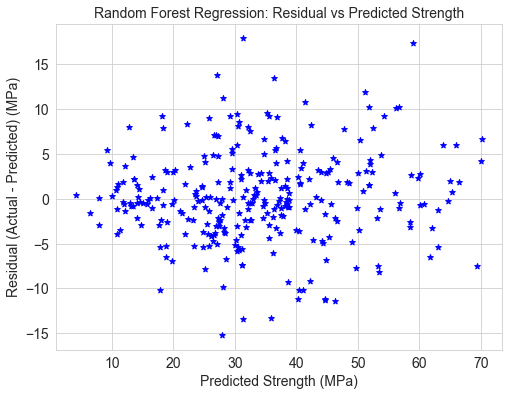

In [220]:
y_pred_rfr = grid_rfr.predict(X_test)
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_pred_rfr, color='blue')
plt.plot([0,80],[0,80], color='black')
plt.title('Random Forest Regression: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_pred_rfr, y_test['strength']-y_pred_rfr, marker='*', color ='blue')
plt.title('Random Forest Regression: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

In [230]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf1 = pd.DataFrame({'Method':['Random Forest Regressor'], 'best score': grid_rfr.best_score_})
resultsDf1 = resultsDf1[['Method', 'best score']]
resultsDf1

,Method,best score
0,Random Forest Regressor,0.90213


In [222]:
# Bagging Regressor with Gridsearch
pipe_bg = Pipeline([
              ('scl', StandardScaler()),
              ('bg', BaggingRegressor(random_state=1))])

param_grid = { 'bg__base_estimator':[SVR(), DecisionTreeRegressor()],
               'bg__n_estimators':[20, 40, 60, 80, 100],
              #'bag__min_samples_split': [2,4,8],
              #'bag__max_features': ["auto", "sqrt", "log2"],
              'bg__bootstrap': [True, False]}         
grid_bg = GridSearchCV( pipe_bg , param_grid = param_grid, cv = 10) 

grid_bg.fit(X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_bg.best_score_)) 
print(" Best parameters: ", grid_bg.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_bg.score( X_test, y_test)))

 Best cross-validation accuracy: 0.90
 Best parameters:  {'bg__base_estimator': DecisionTreeRegressor(), 'bg__bootstrap': True, 'bg__n_estimators': 100}
 Test set accuracy: 0.89


In [231]:
tempResultsDf1 = pd.DataFrame({'Method':['BaggingRegressor'], 'best score': grid_bg.best_score_})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1

,Method,best score
0,Random Forest Regressor,0.90213
0,BaggingRegressor,0.90157


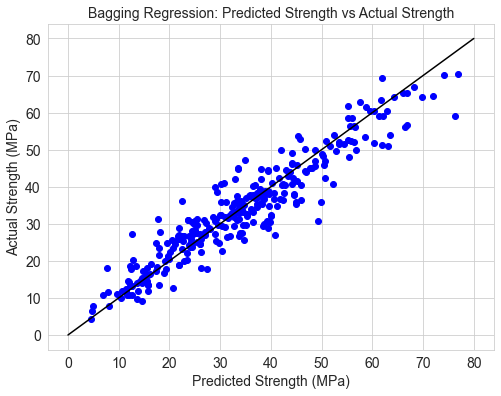

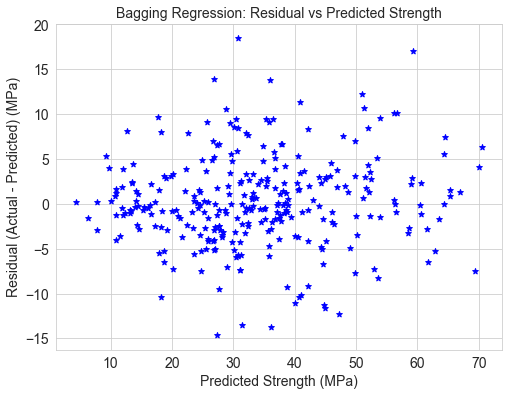

In [224]:
y_pred_bg = grid_bg.predict(X_test)
# Check the actual vs prediction
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test['strength'], y_pred_bg, color='blue')
plt.plot([0,80],[0,80], color='black')
plt.title('Bagging Regression: Predicted Strength vs Actual Strength', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.ylabel('Actual Strength (MPa)', fontsize=14)
plt.show()
# Plot between residual(actual - predicted) and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_pred_bg, y_test['strength']-y_pred_bg, marker='*', color ='blue')
plt.title('Bagging Regression: Residual vs Predicted Strength', fontsize=14)
plt.ylabel('Residual (Actual - Predicted) (MPa)', fontsize=14)
plt.xlabel('Predicted Strength (MPa)', fontsize=14)
plt.show()

In [225]:
# Adaboosting Regressor with Gridsearch
pipe_ada = Pipeline([
              ('scl', StandardScaler()),
              ('ada', AdaBoostRegressor(random_state = 1))]) 

param_grid = { 'ada__base_estimator':[SVR(), DecisionTreeRegressor(max_depth=3), 
                                      DecisionTreeRegressor(max_depth = 5),
                                     DecisionTreeRegressor(max_depth = 7),
                                     DecisionTreeRegressor(max_depth = 50)],
              'ada__n_estimators':[50,100, 150, 200],
             'ada__loss':['linear', 'square', 'exponential']}         

grid_ada = GridSearchCV(pipe_ada, param_grid = param_grid, cv = 10) 


grid_ada.fit(X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_ada.best_score_)) 
print(" Best parameters: ", grid_ada.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_ada.score( X_test, y_test)))


 Best cross-validation accuracy: 0.89
 Best parameters:  {'ada__base_estimator': DecisionTreeRegressor(max_depth=50), 'ada__loss': 'square', 'ada__n_estimators': 50}
 Test set accuracy: 0.87


In [232]:
tempResultsDf1 = pd.DataFrame({'Method':['AdaBoostRegressor'], 'best score': grid_ada.best_score_})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1

,Method,best score
0,Random Forest Regressor,0.902130
0,BaggingRegressor,0.901570
0,AdaBoostRegressor,0.887245


### Insights
- Adaboostregressor performance improved a lot comparing after hyperparameter tuning